In [57]:
import os
import csv
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [58]:
# Changing Directory
os.chdir("A:\\WebEconomics\\dataset")


In [59]:
# Reading Data
df = pd.read_csv('train.csv')

In [60]:
# Define our features
features = ["click", "weekday", "hour", "region", "slotwidth", 'slotheight', 'bidprice', 'payprice']
df = df[features]

In [61]:
df['slotsize'] = df['slotwidth'] * df['slotheight'] 
df.drop(['slotwidth', 'slotheight'], axis=1, inplace=True)

In [62]:
df.head()

,click,weekday,hour,region,bidprice,payprice,slotsize
0,0,1,14,80,300,54,28080
1,0,2,20,94,249,42,62500
2,0,5,9,216,300,76,94080
3,0,2,20,216,238,182,65520
4,0,6,9,40,238,34,85500


In [63]:
dfNoClick = df[df['click']==0]
dfClick = df[df['click']==1]

In [64]:
dfNoClick.head()

,click,weekday,hour,region,bidprice,payprice,slotsize
0,0,1,14,80,300,54,28080
1,0,2,20,94,249,42,62500
2,0,5,9,216,300,76,94080
3,0,2,20,216,238,182,65520
4,0,6,9,40,238,34,85500


In [65]:
dfClick.head()

,click,weekday,hour,region,bidprice,payprice,slotsize
1104,1,6,16,333,238,216,65520
2273,1,1,0,94,300,210,94080
2406,1,0,18,27,300,90,75000
2609,1,4,0,216,227,236,75000
4383,1,4,20,27,300,70,90000


## Labeling and Categorising Data

Categorising:
- Hour: 
    - 0:00~07:59 : 1
    - 08:00~15:59: 2
    - 16:00~23:59: 3
- Size:
    - 0~40000     : 1
    - 40000~80000 : 2
    - 80000~120000: 3

### DF

In [66]:
df['hour'] = pd.cut(df['hour'], bins = [0,8,16,23.5], right=False, labels=[1,2,3])
df['slotsize'] = pd.cut(df['slotsize'], bins = [0,40000,80000,120000], right=True, labels=[1,2,3])
df.head()  

,click,weekday,hour,region,bidprice,payprice,slotsize
0,0,1,2,80,300,54,1
1,0,2,3,94,249,42,2
2,0,5,2,216,300,76,3
3,0,2,3,216,238,182,2
4,0,6,2,40,238,34,3


### DFNoClick

In [67]:
dfNoClick['hour'] = pd.cut(dfNoClick['hour'], bins = [0,8,16,23.5], right=False, labels=[1,2,3])
dfNoClick['slotsize'] = pd.cut(dfNoClick['slotsize'], bins = [0,40000,80000,120000], \
                               right=True, labels=[1,2,3])
dfNoClick.head()   

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,click,weekday,hour,region,bidprice,payprice,slotsize
0,0,1,2,80,300,54,1
1,0,2,3,94,249,42,2
2,0,5,2,216,300,76,3
3,0,2,3,216,238,182,2
4,0,6,2,40,238,34,3


### DFClick

In [68]:
dfClick['hour'] = pd.cut(dfClick['hour'], bins = [0,8,16,23.5], right=False, labels=[1,2,3])
dfClick['slotsize'] = pd.cut(dfClick['slotsize'], bins = [0,40000,80000,120000], right=True, labels=[1,2,3])
dfClick.head()     

C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,click,weekday,hour,region,bidprice,payprice,slotsize
1104,1,6,3,333,238,216,2
2273,1,1,1,94,300,210,3
2406,1,0,3,27,300,90,2
2609,1,4,1,216,227,236,2
4383,1,4,3,27,300,70,3


## GroupBy Desired Features

In [69]:
desiredFeatures = ["click", "weekday", "hour", "region", "slotsize", "bidprice", "payprice"]

### DFNoClick

In [70]:
#dfCatNoClick = dfNoClick.groupby(desiredFeatures).size().rename(columns={0:'NoClick_count'})
#dfCatNoClick.head()

In [71]:
dfCatNoClick = dfNoClick.groupby(desiredFeatures).size().reset_index().rename(columns={0:'NoClick_count'})
dfCatNoClick.head()

,click,weekday,hour,region,slotsize,bidprice,payprice,NoClick_count
0,0,0,1,0,1,238,5,1
1,0,0,1,0,1,238,18,1
2,0,0,1,0,1,238,63,1
3,0,0,1,0,1,238,78,1
4,0,0,1,0,1,238,123,1


### DFClick

In [72]:
#dfClickCat = dfClick.groupby(desiredFeatures).size().rename(columns={0:'Click_count'}).to_frame()
dfClickCat = dfClick.groupby(desiredFeatures).size().reset_index().rename(columns={0:'Click_count'})
dfClickCat.head()

,click,weekday,hour,region,slotsize,bidprice,payprice,Click_count
0,1,0,1,0,2,227,130,1
1,1,0,1,0,2,300,50,1
2,1,0,1,0,3,300,264,1
3,1,0,1,1,2,227,154,1
4,1,0,1,1,3,300,69,1


## Mering DFNoClick and DFClick

In [73]:
ndf = pd.merge(dfClickCat.iloc[:,1:6], dfCatNoClick.iloc[:,1:6], \
               how='outer', on= ["weekday", "hour", "region", "slotsize", "bidprice", "payprice"], \
              sort=False)
ndf.head()

KeyError: 'payprice'

In [ ]:
ndf = ndf.fillna(0)
ndf.head()

In [ ]:
ndf['Click_total'] = ndf["NoClick_count"] + ndf["Click_count"]
ndf.head()

## CTR

In [ ]:
ndf['CTR'] = ndf["Click_count"] / ndf["Click_total"]
ndf.head()

## CSV

In [ ]:
ndf.to_csv('ndf1.csv', encoding='utf‐8')

## Observing CTR

In [ ]:
print(ndf['CTR'].describe())
print("variance:", ndf['CTR'].var())
print("skewness:", st.skew(ndf['CTR'],bias=False)) 
print("kurtosis:", st.kurtosis(ndf['CTR'],bias=False)) 

### Plotting

In [ ]:
plt.xlabel('CTR')
plt.ylabel('Numbers')
ndf['CTR'].hist()
plt.yscale("log")
plt.title("Distribution of CTR of 4 Attributes")
plt.legend()
plt.show()

### Leaving Outliers

Reference: [Detect and exclude outliers in Pandas dataframe](http://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-dataframe)

In [ ]:
#ndf[(np.abs(stats.zscore(ndf['CTR'])) < 3)]

In [ ]:
ndf.shape

In [ ]:
noOutlierNDF = ndf[(np.abs(st.zscore(ndf['CTR'])) < 3)]

plt.xlabel('CTR')
plt.ylabel('Numbers')
noOutlierNDF['CTR'].hist()
plt.yscale("log")
plt.title("Distribution of CTR of 4 Attributes (without outlier)")
plt.legend()
plt.show()

# Biding Price for Vlidation data

In [ ]:
# Reading Data
vdf = pd.read_csv('validation.csv')

In [ ]:
# Define our features
features = ["click", "weekday", "hour", "region", "slotwidth", 'slotheight', 'bidprice', 'payprice']
vdf = vdf[features]

In [ ]:
vdf['slotsize'] = vdf['slotwidth'] * vdf['slotheight'] 
vdf.drop(['slotwidth', 'slotheight'], axis=1, inplace=True)
vdf.insert(0, 'order', pd.Series(range(0,vdf.shape[0]+1)))

In [ ]:
print(vdf['payprice'].describe())
print("variance:", vdf['payprice'].var())
print("skewness:", st.skew(vdf['payprice'],bias=False)) 
print("kurtosis:", st.kurtosis(vdf['payprice'],bias=False)) 

The median of Bid Price is 272.923304

In [ ]:
vdf.head()

In [ ]:
vdf['hour'] = pd.cut(vdf['hour'], bins = [0,8,16,23.5], right=False, labels=[1,2,3])
vdf['slotsize'] = pd.cut(vdf['slotsize'], bins = [0,40000,80000,120000], \
                            right=True, labels=[1,2,3])
vdf.head() 

In [ ]:
dfMerge = ndf[["weekday", "hour", "region", 'slotsize', 'CTR']]
dfMerge.columns = ["weekday", "hour", "region", 'slotsize', 'Expected_CTR']
vdf = pd.merge(vdf, dfMerge, how = 'inner', on= ["weekday", "hour", "region", 'slotsize'],\
                 sort=False)
vdf = vdf.sort('order')
vdf.head()

In [ ]:
vdf['Bid_Price_Mean'] = np.median(ndf['payprice']) * (vdf['Expected_CTR']/ndf['CTR'].mean()) 
vdf['Bid_Price_Median'] = np.median(ndf['payprice']) * (vdf['Expected_CTR']/np.median(ndf['CTR'])) 
vdf.head(10)

In [ ]:
vdf.to_csv('vdf.csv', encoding='utf-8')

## Observing Bid Price Mean

In [36]:
print(dfTest['bidprice'].describe())
print("variance:", dfTest['bidprice'].var())
print("skewness:", st.skew(dfTest['bidprice'],bias=False)) 
print("kurtosis:", st.kurtosis(dfTest['bidprice'],bias=False)) 

count    299743.000000
mean        230.505258
std         317.031207
min           0.000000
25%          76.104894
50%         184.268457
75%         294.211634
max       76333.208491
Name: bidprice, dtype: float64
variance: 100508.78594421234
skewness: 50.52663240420146
kurtosis: 11138.434758557629


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


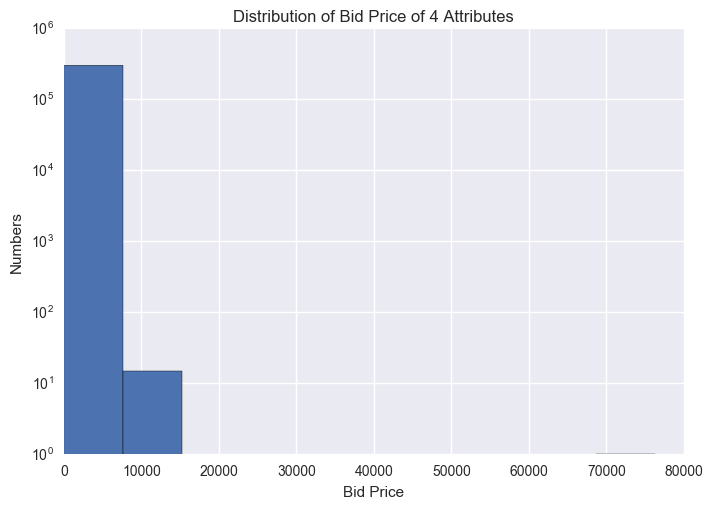

In [37]:
plt.xlabel('Bid Price')
plt.ylabel('Numbers')
dfTest['bidprice'].hist()
plt.yscale("log")
plt.title("Distribution of Bid Price of 4 Attributes")
plt.legend()
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


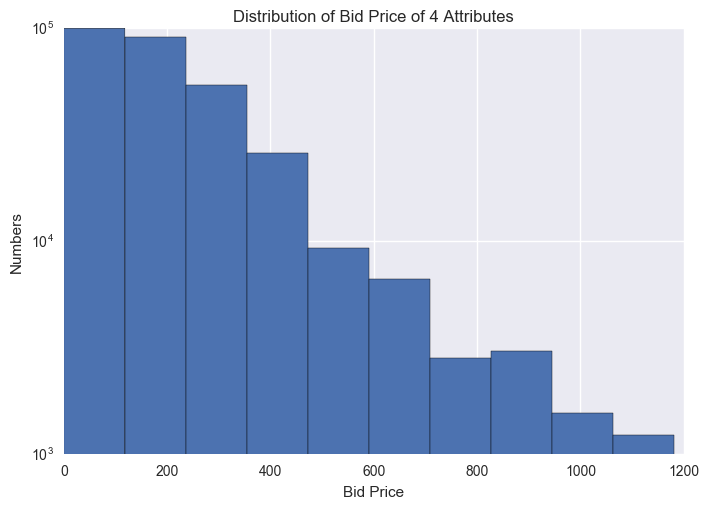

In [38]:
noOutlierTest = dfTest[(np.abs(st.zscore(dfTest['bidprice']) < 3))]


plt.xlabel('Bid Price')
plt.ylabel('Numbers')
noOutlierTest['bidprice'].hist()
plt.yscale("log")
plt.title("Distribution of Bid Price of 4 Attributes")
plt.legend()
plt.show()